In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from train_selection_MAE import Edge, Node, Graph
import seaborn as sns
import os
import imageio

### initialization

In [2]:
if not os.path.exists("lymph_node_output"):
    os.makedirs("lymph_node_output")
# uncomment the line below to run but there are existing files for demo
# !python ../train_net/corr.py --csv_path '../csv/train_path_LN29.csv' --num_biomarkers 29 --save_path 'large_intestine/mae_mtx_LN' --transform_signal normalize2  # get initial edge weights
scores = np.load("lymph_node_output/mae_mtx_LN.npy")

In [3]:
num_biomarkers = 29

nodes = []
for i in range(num_biomarkers):
    nodes.append(Node(i, num_biomarkers))

edges = []
for i in range(num_biomarkers):
    for j in range(i+1,num_biomarkers):
        edge = Edge(scores[i,j])
        edge.nodes = (i,j)
        edges.append(edge)
        nodes[i].edges.append(edge)
        nodes[j].edges.append(edge)

g = Graph(nodes,edges, num_biomarkers)

In [4]:
# chose the 1st input
node_degrees = []
for n in g.nodes:
    degree = sum(e.value for e in n.edges)
    minDegree = min(e.value for e in n.edges)
    n.init_degree = minDegree
    node_degrees.append(degree)
x = np.argmin(node_degrees)

g.input_.append(x)
idx = int(g.input_[-1])

print("add marker",idx, "into input")
print("input:", g.input_)

for i in g.output:
    if i == idx:
        g.output.remove(i)
print("output: ", g.output)

out = g.output.copy()

add marker 21 into input
input: [21]
output:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28]


### Round1

In [5]:
# train the network with currect input and output markers 
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_LN_01'  --path_dataset_csv "../csv/train_path_LN.csv"  --path_dataset_val_csv "../csv/val_path_LN.csv"  --input_index 21  --target_index 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25 26 27 28   --in_dim 1 --out_dim 28
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_LN_01'  --path_output_dir 'lymph_node_output/val_vae_01.npy' --path_dataset_val_csv "../csv/val_path_LN.csv"   --input_index  21  --target_index 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25 26 27 28 --in_dim 1 --out_dim 28

In [6]:
val_loss_path = r'lymph_node_output/val_vae_01.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 10 into input
input: [21, 10]
output:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28]
--out_drop_index: 10


### Round2

In [7]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_LN_02'  --path_pretrain_dir 'test_models_LN_01' --path_dataset_csv "../csv/train_path_LN.csv"  --path_dataset_val_csv "../csv/val_path_LN.csv" --out_drop_index 10 --input_index 21 10  --target_index 0 1 2 3 4 5 6 7 8 9 11 12 13 14 15 16 17 18 19 20 22 23 24 25 26 27 28   --in_dim 2 --out_dim 27
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_LN_02'  --path_output_dir 'lymph_node_output/val_vae_02.npy' --path_dataset_val_csv "../csv/val_path_LN.csv"   --input_index  21 10  --target_index 0 1 2 3 4 5 6 7 8 9 11 12 13 14 15 16 17 18 19 20 22 23 24 25 26 27 28 --in_dim 2 --out_dim 27

In [8]:
val_loss_path = r'lymph_node_output/val_vae_02.npy'    
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 25 into input
input: [21, 10, 25]
output:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 26, 27, 28]
--out_drop_index: 23


### Round3

In [9]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_LN_03'  --path_pretrain_dir 'test_models_LN_02' --path_dataset_csv "../csv/train_path_LN.csv"  --path_dataset_val_csv "../csv/val_path_LN.csv" --out_drop_index 23 --input_index 21 10 25  --target_index 0 1 2 3 4 5 6 7 8 9 11 12 13 14 15 16 17 18 19 20 22 23 24 26 27 28   --in_dim 3 --out_dim 26
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_LN_03'  --path_output_dir 'lymph_node_output/val_vae_03.npy' --path_dataset_val_csv "../csv/val_path_LN.csv"   --input_index  21 10 25  --target_index 0 1 2 3 4 5 6 7 8 9 11 12 13 14 15 16 17 18 19 20 22 23 24 26 27 28 --in_dim 3 --out_dim 26

In [10]:
val_loss_path = r'lymph_node_output/val_vae_03.npy'  
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 3 into input
input: [21, 10, 25, 3]
output:  [0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 26, 27, 28]
--out_drop_index: 3


### Round4

In [11]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_LN_04'  --path_pretrain_dir 'test_models_LN_03' --path_dataset_csv "../csv/train_path_LN.csv"  --path_dataset_val_csv "../csv/val_path_LN.csv" --out_drop_index 3 --input_index 21 10 25 3 --target_index 0 1 2 4 5 6 7 8 9 11 12 13 14 15 16 17 18 19 20 22 23 24 26 27 28   --in_dim 4 --out_dim 25
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_LN_04'  --path_output_dir 'lymph_node_output/val_vae_04.npy' --path_dataset_val_csv "../csv/val_path_LN.csv"   --input_index  21 10 25 3  --target_index 0 1 2 4 5 6 7 8 9 11 12 13 14 15 16 17 18 19 20 22 23 24 26 27 28 --in_dim 4 --out_dim 25

In [12]:
val_loss_path = r'lymph_node_output/val_vae_04.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 22 into input
input: [21, 10, 25, 3, 22]
output:  [0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 26, 27, 28]
--out_drop_index: 19


### Round5

In [13]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_LN_05'  --path_pretrain_dir 'test_models_LN_04' --path_dataset_csv "../csv/train_path_LN.csv"  --path_dataset_val_csv "../csv/val_path_LN.csv" --out_drop_index 19 --input_index 21 10 25 3 22 --target_index 0 1 2 4 5 6 7 8 9 11 12 13 14 15 16 17 18 19 20 23 24 26 27 28   --in_dim 5 --out_dim 24
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_LN_05'  --path_output_dir 'lymph_node_output/val_vae_05.npy' --path_dataset_val_csv "../csv/val_path_LN.csv"   --input_index  21 10 25 3 22  --target_index 0 1 2 3 4 5 6 7 8 9 11 12 13 14 15 16 17 18 19 20 23 24 26 27 28 --in_dim 5 --out_dim 24

In [14]:
val_loss_path = r'lymph_node_output/val_vae_05.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 28 into input
input: [21, 10, 25, 3, 22, 28]
output:  [0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 26, 27]
--out_drop_index: 23


### Round6

In [15]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_LN_06'  --path_pretrain_dir 'test_models_LN_05' --path_dataset_csv "../csv/train_path_LN.csv"  --path_dataset_val_csv "../csv/val_path_LN.csv" --out_drop_index 23 --input_index 21 10 25 3 22 28 --target_index 0 1 2 4 5 6 7 8 9 11 12 13 14 15 16 17 18 19 20 23 24 26 27   --in_dim 6 --out_dim 23
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_LN_06'  --path_output_dir 'lymph_node_output/val_vae_06.npy' --path_dataset_val_csv "../csv/val_path_LN.csv"   --input_index  21 10 25 3 22 28  --target_index 0 1 2 3 4 5 6 7 8 9 11 12 13 14 15 16 17 18 19 20 23 24 26 27 --in_dim 6 --out_dim 23

In [16]:
val_loss_path = r'lymph_node_output/val_vae_06.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 17 into input
input: [21, 10, 25, 3, 22, 28, 17]
output:  [0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 23, 24, 26, 27]
--out_drop_index: 15


### Round7

In [17]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_LN_07'  --path_pretrain_dir 'test_models_LN_06' --path_dataset_csv "../csv/train_path_LN.csv"  --path_dataset_val_csv "../csv/val_path_LN.csv" --out_drop_index 15 --input_index 21 10 25 3 22 28 17 --target_index 0 1 2 4 5 6 7 8 9 11 12 13 14 15 16 18 19 20 23 24 26 27   --in_dim 7 --out_dim 22
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_LN_07'  --path_output_dir 'lymph_node_output/val_vae_07.npy' --path_dataset_val_csv "../csv/val_path_LN.csv"   --input_index  21 10 25 3 22 28 17 --target_index 0 1 2 3 4 5 6 7 8 9 11 12 13 14 15 16 18 19 20 23 24 26 27 --in_dim 7 --out_dim 22

In [18]:
val_loss_path = r'lymph_node_output/val_vae_07.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 5 into input
input: [21, 10, 25, 3, 22, 28, 17, 5]
output:  [0, 1, 2, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 23, 24, 26, 27]
--out_drop_index: 4


### Round8

In [19]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_LN_08'  --path_pretrain_dir 'test_models_LN_07' --path_dataset_csv "../csv/train_path_LN.csv"  --path_dataset_val_csv "../csv/val_path_LN.csv" --out_drop_index 4 --input_index 21 10 25 3 22 28 17 5 --target_index 0 1 2 4 6 7 8 9 11 12 13 14 15 16 18 19 20 23 24 26 27   --in_dim 8 --out_dim 21
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_LN_08'  --path_output_dir 'lymph_node_output/val_vae_08.npy' --path_dataset_val_csv "../csv/val_path_LN.csv"   --input_index  21 10 25 3 22 28 17 5 --target_index 0 1 2 4 6 7 8 9 11 12 13 14 15 16 18 19 20 23 24 26 27 --in_dim 8 --out_dim 21

In [20]:
val_loss_path = r'lymph_node_output/val_vae_08.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()


add 4 into input
input: [21, 10, 25, 3, 22, 28, 17, 5, 4]
output:  [0, 1, 2, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 23, 24, 26, 27]
--out_drop_index: 3


### Round9

In [21]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_LN_09'  --path_pretrain_dir 'test_models_LN_08' --path_dataset_csv "../csv/train_path_LN.csv"  --path_dataset_val_csv "../csv/val_path_LN.csv" --out_drop_index 3 --input_index 21 10 25 3 22 28 17 5 4 --target_index 0 1 2 6 7 8 9 11 12 13 14 15 16 18 19 20 23 24 26 27   --in_dim 9 --out_dim 20
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_LN_09'  --path_output_dir 'lymph_node_output/val_vae_09.npy' --path_dataset_val_csv "../csv/val_path_LN.csv"   --input_index  21 10 25 3 22 28 17 5 4 --target_index 0 1 2 6 7 8 9 11 12 13 14 15 16 18 19 20 23 24 26 27 --in_dim 9 --out_dim 20

In [22]:
val_loss_path = r'lymph_node_output/val_vae_09.npy'  
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 24 into input
input: [21, 10, 25, 3, 22, 28, 17, 5, 4, 24]
output:  [0, 1, 2, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 23, 26, 27]
--out_drop_index: 17


### Round10

In [23]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_LN_10'  --path_pretrain_dir 'test_models_LN_09' --path_dataset_csv "../csv/train_path_LN.csv"  --path_dataset_val_csv "../csv/val_path_LN.csv" --out_drop_index 17 --input_index 21 10 25 3 22 28 17 5 4 24 --target_index 0 1 2 6 7 8 9 11 12 13 14 15 16 18 19 20 23 26 27   --in_dim 10 --out_dim 19
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_LN_10'  --path_output_dir 'lymph_node_output/val_vae_10.npy' --path_dataset_val_csv "../csv/val_path_LN.csv"   --input_index  21 10 25 3 22 28 17 5 4 24 --target_index 0 1 2 6 7 8 9 11 12 13 14 15 16 18 19 20 23 26 27 --in_dim 10 --out_dim 19

In [24]:
val_loss_path = r'lymph_node_output/val_vae_10.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 1 into input
input: [21, 10, 25, 3, 22, 28, 17, 5, 4, 24, 1]
output:  [0, 2, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 23, 26, 27]
--out_drop_index: 1


### Round11

In [25]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_LN_11'  --path_pretrain_dir 'test_models_LN_10' --path_dataset_csv "../csv/train_path_LN.csv"  --path_dataset_val_csv "../csv/val_path_LN.csv" --out_drop_index 1 --input_index 21 10 25 3 22 28 17 5 4 24 1 --target_index 0 2 6 7 8 9 11 12 13 14 15 16 18 19 20 23 26 27   --in_dim 11 --out_dim 18
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_LN_11'  --path_output_dir 'lymph_node_output/val_vae_11.npy' --path_dataset_val_csv "../csv/val_path_LN.csv"   --input_index  21 10 25 3 22 28 17 5 4 24 1 --target_index 0 2 6 7 8 9 11 12 13 14 15 16 18 19 20 23 26 27 --in_dim 11 --out_dim 18

In [26]:
val_loss_path = r'lymph_node_output/val_vae_11.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx)
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 14 into input
input: [21, 10, 25, 3, 22, 28, 17, 5, 4, 24, 1, 14]
output:  [0, 2, 6, 7, 8, 9, 11, 12, 13, 15, 16, 18, 19, 20, 23, 26, 27]
--out_drop_index: 9


### Round12

In [27]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_LN_12'  --path_pretrain_dir 'test_models_LN_11' --path_dataset_csv "../csv/train_path_LN.csv"  --path_dataset_val_csv "../csv/val_path_LN.csv" --out_drop_index 9 --input_index 21 10 25 3 22 28 17 5 4 24 1 14 --target_index 0 2 6 7 8 9 11 12 13 15 16 18 19 20 23 26 27   --in_dim 12 --out_dim 17
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_LN_12'  --path_output_dir 'lymph_node_output/val_vae_12.npy' --path_dataset_val_csv "../csv/val_path_LN.csv"   --input_index  21 10 25 3 22 28 17 5 4 24 1 14 --target_index 0 2 6 7 8 9 11 12 13 15 16 18 19 20 23 26 27 --in_dim 12 --out_dim 17

In [28]:
val_loss_path = r'lymph_node_output/val_vae_12.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 9 into input
input: [21, 10, 25, 3, 22, 28, 17, 5, 4, 24, 1, 14, 9]
output:  [0, 2, 6, 7, 8, 11, 12, 13, 15, 16, 18, 19, 20, 23, 26, 27]
--out_drop_index: 5


In [32]:
with open('marker_list/LN29.txt') as f:
    ln_markers = f.read().splitlines()

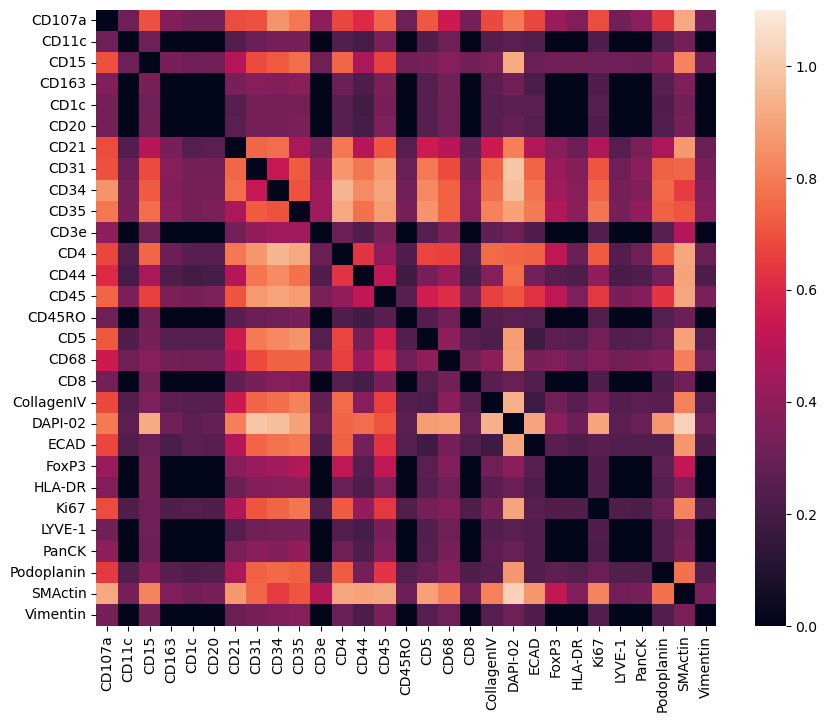

In [39]:
n = len(g.nodes)
edge_mtx = np.zeros((n, n))
for i in range(n):
    edges = g.nodes[i].edges
    for k in range(i, len(edges)):
        j = k+1
        edge_mtx[i,j] = edges[k].value
for j in range(n):
    edge_mtx[j, j] = 0
    for i in range(j+1, n):
        edge_mtx[i, j] = edge_mtx[j, i]

fig, ax = plt.subplots(figsize=(10, 8))
df = pd.DataFrame(edge_mtx)
p = sns.heatmap(df, xticklabels=True, yticklabels=True, vmin=0, vmax = 1.1)
p.set_xticklabels(ln_markers, rotation=90)
p.set_yticklabels(ln_markers, rotation=0)
plt.show()

### test

In [ ]:
# !python predict_full_view.py --transform_signal normalize2 --save_image  --path_run_dir 'test_models_LN_12'  --path_dataset_csv "test_path_LN.csv" --input_index 21 10 25 3 22 28 17 5 4 24 1 14 --target_index 0 2 6 7 8 9 11 12 13 15 16 18 19 20 23 26 27 